In [16]:
import random
import operator

city_num = []
random.shuffle

<bound method Random.shuffle of <random.Random object at 0x000002142023C340>>

In [17]:
##生产初始城市信息
import pandas as pd
city_num = 27
data_y = [random.uniform(1,10) for _ in range(city_num)]
data_x = [random.uniform(1,10) for _ in range(city_num)]
row_id = [i for i in range(city_num)]
data_tsp = pd.DataFrame(columns =['x','y','id'])
data_tsp['x']= data_x
data_tsp['y']= data_y
data_tsp['id']= row_id

In [18]:
def get_fitness(chromosome_list,dist_matrix):
        fitness_ratio_list = []
        for j in range(len(chromosome_list)):
            fitness_list = []
            for i in range(dist_matrix.shape[0]-1):
                if i != dist_matrix.shape[0]-1:
                    fitness_list.append(1/dist_matrix[chromosome_list[j][i],chromosome_list[j][i+1]])
                else: fitness_list.append(1/dist_matrix[chromosome_list[j][city_num-1],chromosome_list[j][0]])
            fitness_ratio_list.append(sum(fitness_list))
        return fitness_ratio_list

In [19]:
def select(chromosome_list,fitness_ratio_add):
    rand_list = [random.uniform(0, 1) for _ in chromosome_list]     # 生成和种群规模相等的随机值列表，用于轮盘赌选择个体
    rand_list.sort()
    fit_index =0
    new_index = 0
    new_pop = chromosome_list.copy()
    while new_index < len(chromosome_list):
        if rand_list[new_index] < fitness_ratio_add[fit_index]:
            new_pop[new_index] = chromosome_list[fit_index]
            new_index = new_index +1
        else:
            fit_index = fit_index+1
    return new_pop

In [20]:
def select_sorted_population(fitness, population, length):
    global population_size
    sort_dict = {}
    for i in range(len(population)):
        sort_dict[(fitness[i], 1 / fitness[i])] = i

    sorted_key = sorted(sort_dict.keys(), key=operator.itemgetter(0), reverse=True)

    sorted_index = [sort_dict[i] for i in sorted_key]
    sorted_population = [population[i] for i in sorted_index]

    return sorted_population[:length]


In [21]:
## 交换基因操作
def exchange(chromosome_list,pc):
    for i in range(0, len(chromosome_list) - 1, 2):
            if random.uniform(0, 1) < pc:
                index_1 = random.randint(0, len(chromosome_list[0])-1)
                index_2 = random.randint(index_1, len(chromosome_list[0])-1)
                temp_gene_1 = chromosome_list[i+1][index_1:index_2]
                # 随机生成交叉点
                newGene_1 = []
                p1len = 0
                for g in chromosome_list[i]:

                    if p1len == index_1:
                            newGene_1.extend(temp_gene_1)                               #插入基因片段
                            p1len += 1
                    if g not in temp_gene_1:
                            newGene_1.append(g)
                            p1len += 1

                index_1 = random.randint(0, len(chromosome_list[0])-1)
                index_2 = random.randint(index_1, len(chromosome_list[0])-1)
                temp_gene_2 = chromosome_list[i][index_1:index_2]
                # 随机生成交叉点
                newGene_2 = []
                p1len = 0
                for g in chromosome_list[i+1]:

                    if p1len == index_1:
                            newGene_2.extend(temp_gene_2)                               #插入基因片段
                            p1len += 1
                    if g not in temp_gene_2:
                            newGene_2.append(g)
                            p1len += 1
                chromosome_list[i] = newGene_1
                chromosome_list[i+1] = newGene_2
    return chromosome_list

In [22]:
## 变异操作 某个城市变异
def mutation(chromosome_list,mc):
    for i in range(len(chromosome_list)):
        if random.uniform(0,1) < mc:
            m_point = random.randint(0,len(chromosome_list[0])-1)
            rand_num = random.randint(0,26)
            old_num = chromosome_list[i][m_point]
            chromosome_list[i][m_point] = rand_num
            chromosome_list[i][np.argwhere(np.asarray(chromosome_list[i]) == rand_num)[0][0]] = old_num
            
    return chromosome_list

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

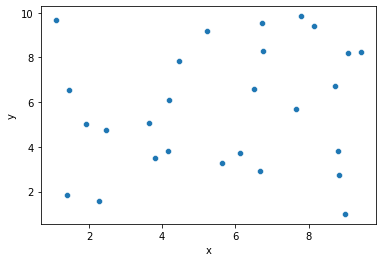

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.scatterplot(data_tsp.x,data_tsp.y)

优化样本选择过程

首先选择最优四分之一样本
其次通过轮盘赌选择当前较优的样本进行crossover

In [24]:
# 轮赌盘选择算子
def selection(fitness, num):
    def select_one(fitness, fitness_sum):
        size = len(fitness)
        i = random.randint(0, size - 1)
        while True:
            if random.random() < fitness[i] / fitness_sum:
                return i
            else:
                i = (i + 1) % size

    res = set()
    fitness_sum = sum(fitness)
    while len(res) < num:
        t = select_one(fitness, fitness_sum)
        res.add(t)
    return res

In [25]:

# 排序，并且返回length长的population
def select_sorted_population(fitness, population, length):
    sort_dict = {}
    for i in range(len(population)):
        sort_dict[(fitness[i], 1 / fitness[i])] = i

    sorted_key = sorted(sort_dict.keys(), key=operator.itemgetter(0), reverse=True)

    sorted_index = [sort_dict[i] for i in sorted_key]
    sorted_population = [population[i] for i in sorted_index]

    return sorted_population[:length]

In [26]:
## 轮盘赌选出两个比较好的然后，在对他们进行交叉复制，然后再进行变异
# 轮赌盘选择算子
def selection(fitness, num):
    def select_one(fitness, fitness_sum):
        size = len(fitness)
        i = random.randint(0, size - 1)
        while True:
            if random.random() < fitness[i] / fitness_sum:
                return i
            else:
                i = (i + 1) % size

    res = set()
    fitness_sum = sum(fitness)
    while len(res) < num:
        t = select_one(fitness, fitness_sum)
        res.add(t)
    return res

def crossover(p1,p2):
    a = random.randint(0,len(p1)-1)
    p1_part,p2_part = p1[a:],p2[a:]
    p1_part_new = []
    p2_part_new = []
    for i in p1:
        if i not in p2_part:
            p1_part_new.append(i)
    p1_part_new.appned(p2_part)
    for i in p2:
        if i not in p1_part:
            p2_part_new.append(i)
    p2_part_new.appned(p1_part)



    

In [27]:
# 杂交算子
def crossover(parent1, parent2):

    a = random.randint(1, len(parent1) - 1)
    child1, child2 = parent1[:a], parent2[:a]

    for i in range(len(parent1)):
        if parent2[i] not in child1:
            child1.append(parent2[i])

        if parent1[i] not in child2:
            child2.append(parent1[i])

    return child1, child2


def get_two(length):
    b=a = random.randint(0,length-1)
    while a==b:
        b = random.randint(0,length-1)
    if a>b:
        return b,a
    else: return a,b

def mutaion_exchange(s):
    # 自己手写的2变换
    a, b = get_two(len(s))
    for i in range(a, (a + b) // 2 + 1):
        s[i], s[b + a - i] = s[b + a - i], s[i]

    return s

# 滑动变异
def slide_mutation(s):
    a, b = get_two(len(s))
    t = s[a]
    for i in range(a + 1, b + 1):
        s[i - 1] = s[i]
    s[b] = t
    return s

def get_fitness_one(p1,dist_matrix):
    fitness_list = []
    for i in range(dist_matrix.shape[0]-1):
        if i != dist_matrix.shape[0]-1:
            fitness_list.append(1/dist_matrix[p1[i],p1[i+1]])
        else: fitness_list.append(1/dist_matrix[p1[city_num-1],p1[0]])
    return sum(fitness_list)
# SMB
def select_best_mutaion(s, dist_matrix):
    s_res = [mutaion_exchange(s[:]), slide_mutation(s[:])]
    res = [get_fitness_one(s_res[0], dist_matrix), get_fitness_one(s_res[1], dist_matrix)]

    min_index = res.index(max(res))

    return s_res[min_index]    

In [28]:
## 随机生成20个初始随机路线
import itertools
import pandas as pd
city_num = 70
p_mutation = 0.02
data_y = [random.uniform(1,10) for _ in range(city_num)]
data_x = [random.uniform(1,10) for _ in range(city_num)]
row_id = [i for i in range(city_num)]
data_tsp = pd.DataFrame(columns =['x','y','id'])
data_tsp['x']= data_x
data_tsp['y']= data_y
data_tsp['id']= row_id
chromosome_list = []
sample_1 = [i for i in range(city_num)]


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3


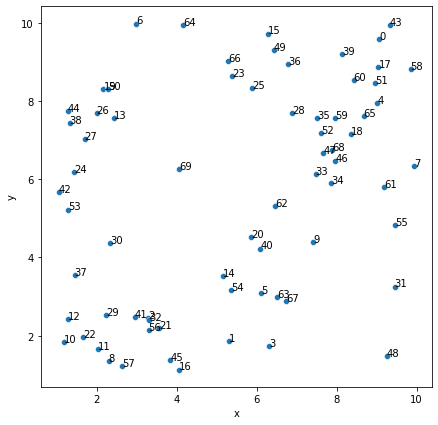

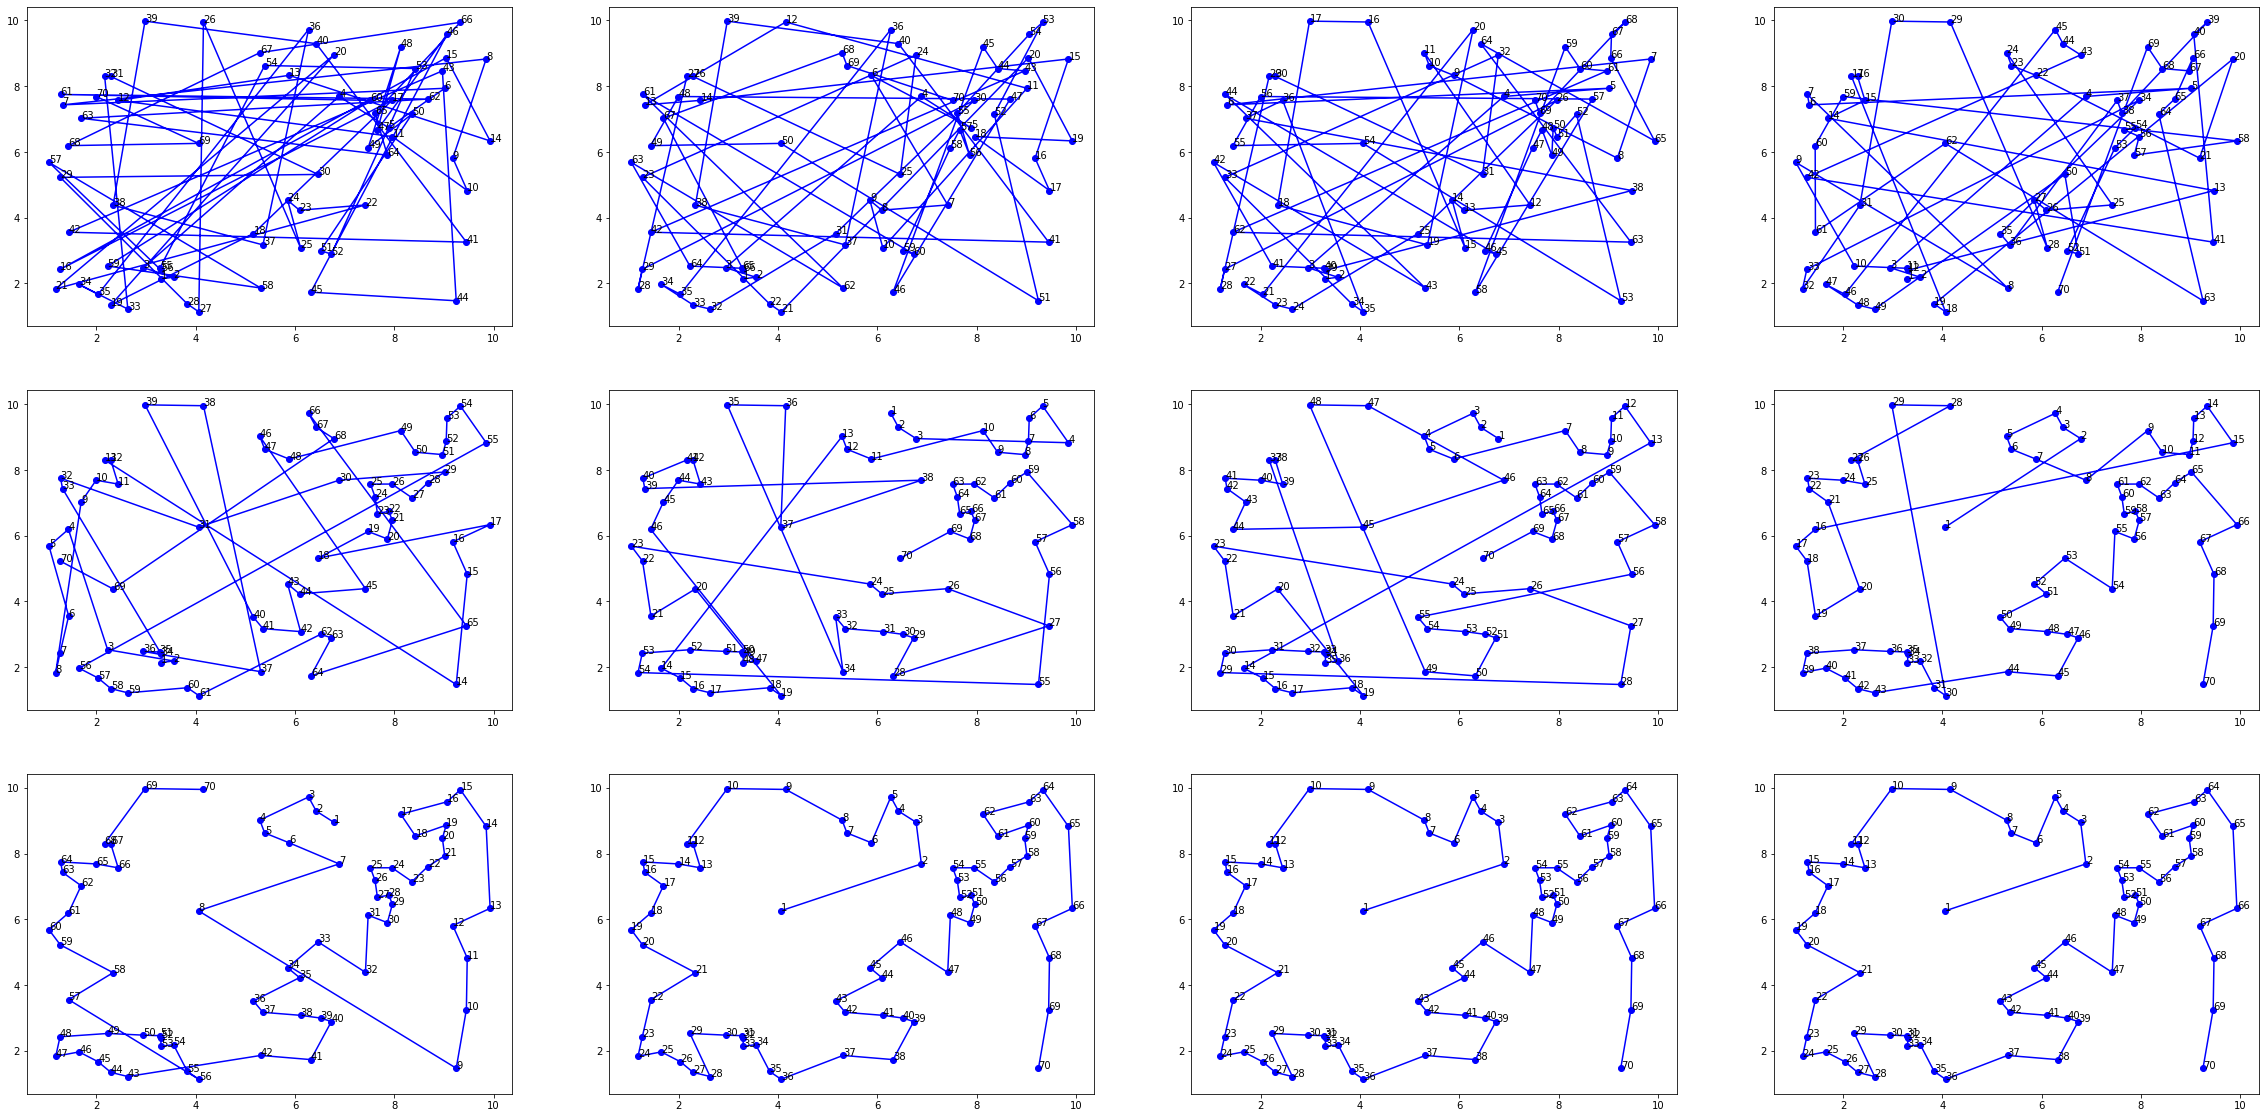

In [163]:
population_size = 50
for i in range(population_size):
    random.shuffle(sample_1)
    chromosome_list.append(sample_1[:])


from matplotlib import pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(1,1,figsize=(7,7))
sns.scatterplot(data_tsp.x,data_tsp.y,ax =axes)
for i in range(len(data_tsp.x)):
    x_t = data_tsp.x[i]
    y_t = data_tsp.y[i]
    axes.annotate(text = data_tsp.index[i], xy=(x_t, y_t), xytext=(x_t, y_t))

## 计算两两之间距离
import numpy as np
dist_matrix =  np.zeros([city_num,city_num])
for i in range(city_num):
    for j in range(city_num):
        a = data_tsp[data_tsp['id']==i][['x','y']].loc[i]-data_tsp[data_tsp['id']==j][['x','y']].loc[j]
        dist_matrix[i,j] = a.x**2 + a.y**2


## 循环优化
fitness_ratio_list = get_fitness(chromosome_list,dist_matrix)
fitness_ratio_add = list(itertools.accumulate(fitness_ratio_list))
fitness_ratio_add = fitness_ratio_add/sum(fitness_ratio_list)
import itertools
best_result = []
best_fitness = []
generation = 5000
picture = [0.001,0.005,0.01,0.02,0.05,0.08,0.1,0.2,0.3,0.5,0.8,1]
picture_new = [i * generation for i in picture]
population_cur = chromosome_list
d = 0
fig,axes = plt.subplots(3,4,figsize=(40,20)) 
for t in range(0,generation,1):
    ## 选出比较好的前1/4样本
    population_next = select_sorted_population(fitness_ratio_list,population_cur,len(chromosome_list)//4)
    for i in range(population_size):
        a,b = selection(fitness_ratio_list,2)
        child1,child2 = crossover(population_cur[a],population_cur[b])
            # 变异
        if random.random() < p_mutation:
                child1 = select_best_mutaion(child1,dist_matrix)
        if random.random() < p_mutation:
                child2 = select_best_mutaion(child2,dist_matrix)      
        population_next.append(child1)
        population_next.append(child2)

        # 选出下一代的种群
    fitness_ratio_list = get_fitness(population_next,dist_matrix)
    population_next = select_sorted_population(fitness_ratio_list, population_next, population_size)
    population_cur = population_next
    fitness_ratio_list = get_fitness(population_cur,dist_matrix)
    fitness_ratio_add = list(itertools.accumulate(fitness_ratio_list))
    fitness_ratio_add = fitness_ratio_add/sum(fitness_ratio_list)
    best_result.append(population_cur[int(np.argwhere(fitness_ratio_list == max(fitness_ratio_list))[0])])
    best_fitness.append(max(fitness_ratio_list))
    
    if int(t+1) == int(picture_new[d]):
            x1 = []
            y1 =[]
            x2 =[]
            y2 = []
            if (d+1)%4 ==0:
                e,g = (d+1)//4-1,3
            else: e,g=(d+1)//4,d%4
            for i in range(len(data_tsp)):
                x1.append(data_tsp.x[i])
                y1.append(data_tsp.y[i])
            for i in range(len(best_result[0])):
                x2.append(data_tsp.x[best_result[best_fitness.index(max(best_fitness))][i]])
                y2.append(data_tsp.y[best_result[best_fitness.index(max(best_fitness))][i]])
            axes[e,g].plot(x2,y2,color='blue',marker='o' ); #画点
            for i in range(len(x2)):
                axes[e,g].text(x2[i],y2[i],i+1) 
            d =d+ 1
            print(e,g)
    
    
# x = [i for i in range(generation)]
# fig1 = plt.figure('figure', figsize=(13, 5)).add_subplot(121)
# fig1.plot(x, best_fitness)
# plt.show()
# print("self.best_dist",end=":")

# print("self.best_individual",end=":")

# x1=[]
# y1=[]
# x2=[]
# y2=[]
# for i in range(len(data_tsp)):
#     x1.append(data_tsp.x[i])
#     y1.append(data_tsp.y[i])
# for i in range(len(best_result[0])):
#     x2.append(data_tsp.x[best_result[best_fitness.index(max(best_fitness))][i]])
#     y2.append(data_tsp.y[best_result[best_fitness.index(max(best_fitness))][i]])
# plt.title("citys_position")
# plt.scatter(x1,y1,color='blue',marker='o' ); #画点
# plt.figure();
# plt.title("best_route")
# plt.plot(x2,y2,color='blue',marker='o' ); #画点
# for i in range(len(x2)):
#     plt.text(x2[i],y2[i],i+1)
# plt.figure();
# plt.title("best_dist_change")
# ## plt.plot(self.best_dist_list,color='r')
# plt.show()

In [159]:
len(best_result[best_fitness.index(max(best_fitness))])

70

In [155]:
len(x2)

140

In [ ]:
x = [i for i in range(generation)]
fig1 = plt.figure('figure', figsize=(13, 5)).add_subplot(121)
fig1.plot(x, best_fitness)
plt.show()
print("self.best_dist",end=":")

print("self.best_individual",end=":")

x1=[]
y1=[]
x2=[]
y2=[]
for i in range(len(data_tsp)):
    x1.append(data_tsp.x[i])
    y1.append(data_tsp.y[i])
for i in range(len(best_result[0])):
    x2.append(data_tsp.x[best_result[best_fitness.index(max(best_fitness))][i]])
    y2.append(data_tsp.y[best_result[best_fitness.index(max(best_fitness))][i]])
print("x1:",end="")
print(x1)
print("y1:",end="")
print(y1)
print("x2:",end="")
print(x2)
print("y2:",end="")
print(y2)
plt.title("citys_position")
plt.scatter(x1,y1,color='blue',marker='o' ); #画点
plt.figure();
plt.title("best_route")
plt.plot(x2,y2,color='blue',marker='o' ); #画点
for i in range(len(x2)):
    plt.text(x2[i],y2[i],i+1)
plt.figure();
plt.title("best_dist_change")
## plt.plot(self.best_dist_list,color='r')
plt.show()